# A gentle introduction to classification

### 1. Linear regression for classification

Dataset: 


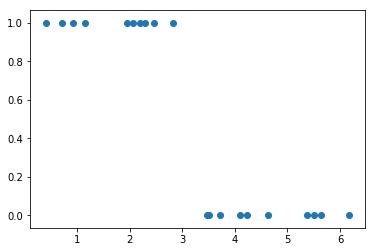

0 8.83708
100 2.61497
200 1.52106
300 1.32019
400 1.28331
500 1.27654
600 1.27529
700 1.27507
800 1.27502
900 1.27502
learned parameters [ 1.30339062 -0.25350451]
accuracy 1.0


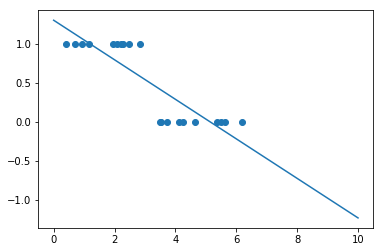

In [5]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def createDataset():
    
    # Initialize fake data, 10 instances of each label
    x_label0 = np.random.normal(5, 1, 10)
    x_label1 = np.random.normal(2, 1, 10)
    xs = np.append(x_label0, x_label1)
    
    # Initialize the corresponding labels
    labels = [0.] * len(x_label0) + [1.] * len(x_label1)
    
    # Plot the data
    print("Dataset: ")
    plt.scatter(xs, labels)
    plt.show()
    
    return xs,labels


# Define a linear y = w1 * x + w0 model.
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))


xs,labels = createDataset()

# Declare the hyper-parameters
learning_rate = 0.001
training_epochs = 1000

# Set up the placeholder nodes for the input/output pairs and parameter variable
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0., 0.], name="parameters")

# Call model helper function
y_model = model(X, w)

# Define the cost function and the rule to learn the parameters
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# When the model’s response is greater than 0.5, it should be a positive label, and vice versa
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

# Open a new session and initialize the variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Run the learning operation multiple times
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

w_val = sess.run(w)
print('learned parameters', w_val)
print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))
sess.close()

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()

### 2. Logistic regression

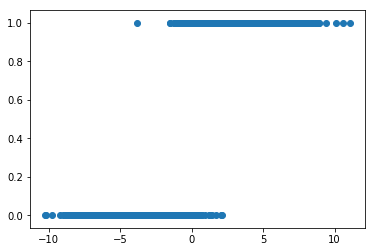

0 0.693146
100 0.144
200 0.106125
300 0.0914607


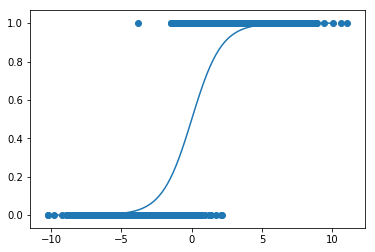

In [11]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



def createDataset():
    x1 = np.random.normal(-4, 2, 1000)
    x2 = np.random.normal(4, 2, 1000)
    xs = np.append(x1, x2)
    ys = np.asarray([0.] * len(x1) + [1.] * len(x2))
    plt.scatter(xs, ys)
    plt.show()
    
    return xs,ys


def model(w,X):
    return tf.sigmoid(w[1] * X + w[0]);



xs,ys = createDataset();

# Set the hyper-parameters
learning_rate = 0.01
training_epochs = 1000

# Set up the placeholder nodes for the inp ut/output pairs and parameter variable
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)


y_model = model(w,X)


# Define the cost function and the rule to learn the parameters
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    
    # Iterate until convergence or until maximum number of epochs reached
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})



all_xs = np.linspace(-10, 10, 100)
with tf.Session() as sess:
    predicted_vals = sess.run(tf.sigmoid(all_xs * w_val[1] + w_val[0]))
plt.plot(all_xs, predicted_vals)
plt.scatter(xs, ys)
plt.show()

### 3. Logistic regression in higher dimensions

0 0.693146
100 0.372819
200 0.273424
300 0.216264
400 0.17977
500 0.154633
600 0.136306
700 0.122356


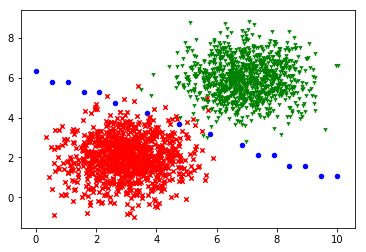

In [13]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

# Initialize some fake data
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))


# Define the input/output placeholder nodes and the parameter node
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

# Define the sigmoid model using both input variables
y_model = tf.sigmoid(-(w[2] * X2 + w[1] * X1 + w[0]))


# Define the learning step
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Create a new session, initialize variables, and learn parameters until convergence
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err

    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

# Define arrays to hold boundary points
x1_boundary, x2_boundary = [], []
with tf.Session() as sess:
    for x1_test in np.linspace(0, 10, 20):
        for x2_test in np.linspace(0, 10, 20):
            z = sess.run(tf.sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0]))
            
            # If the model response is close the 0.5, then update the boundary points
            if abs(z - 0.5) < 0.05:
                x1_boundary.append(x1_test)
                x2_boundary.append(x2_test)
                
                
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

plt.show()

### 4. Softmax classification